<a href="https://colab.research.google.com/github/KayalvizhiT513/Learning-Computer-Vision/blob/main/Coding_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equation of circle:**
$x^2 + y^2 = 1$<br>
To find the area under the curve in the first quadrant:

* **Method1:** Using Reimann Sum
  * Step 1: Divide the area between the points **a** and **b** under the curve into **n** slices of same width
  * Step 2: Calculate sum of the area of the each of the small slices by finding the product of width of a slice and height of the slice
    * width: Δ = (b - a)/n, here a = 0 and b = 1, therefore width, Δ = 1/n
    * height: y <br>
  $$Area = \lim_{Δ \to 0} \sum_{i=1}^{n} f(x_i).Δ$$
* **Method2:** Using Integral calculus
  * Step 1: Rewrite circle equation as $y = \sqrt{1 - x^2}$
  * Step 2: Integrate as x varies between 0 and 1,
  $$Area = \int_{0}^{1}\sqrt{1 - x^2}dx$$
* **Method3:** Using Geometry
  * Area of a quadrant = Area of Circle / 4 = $πr^2 / 4$
  * Given radius = 1, area of quadrant = $π/4$


## Reimann Sum to calculate area

In [1]:
from sympy import *

In [2]:
# Initialize pretty printing for sympy expressions
init_printing(use_unicode=False)

In [3]:
# Define the symbol 'x' for symbolic computation
x = Symbol('x')

In [4]:
# Define the function y = sqrt(1 - x^2)
y = (1 - x**2)**(1/2)

In [5]:
y

        0.5
/     2\   
\1 - x /   

In [6]:
def reimann_sum(y_func, n, a, b):
    # define the width of each subinterval as delta_x
    delta_x = (b - a) / n
    sum = 0
    for i in range(1, n+1):
        # calculate the area of each subinterval and add it to the sum
        sum += y_func.subs(x, a + i * delta_x) * delta_x
    return sum

In [79]:
area = reimann_sum(y, 100, 0, 1)
area

0.780104257944762

In [80]:
def reimann_sum_rect_tri(y_func, n, a, b):
    # define the width of each subinterval as delta_x
    delta_x = (b - a) / n
    sum = 0
    for i in range(1, n+1):
        # calculate the area of each rectangular subinterval and add it to the sum
        sum += y_func.subs(x, a + i * delta_x) * delta_x
    for i in range(0, n-1):
        # calculate the area of each triangular subinterval and add it to the sum
        sum += 0.5 * (y_func.subs(x, a + i * delta_x) - y_func.subs(x, a + (i+1) * delta_x)) * delta_x
    return sum

In [81]:
area_rect_tri = reimann_sum_rect_tri(y, 100, 0, 1)
area_rect_tri

0.784398921145778

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
# Create a list of 'n' values ranging from 5 to 500, incremented by 5
x_vals = [i for i in range(5, 501, 5)]

In [77]:
# Compute the Riemann sum for each value of n in x_vals
area_vals1 = [area for area in map(lambda n: reimann_sum(y, n, 0, 1), x_vals)]
area_vals2 = [area for area in map(lambda n: reimann_sum_rect_tri(y, n, 0, 1), x_vals)]

In [65]:
actual_area = np.full((100,1), area_of_quadrant)

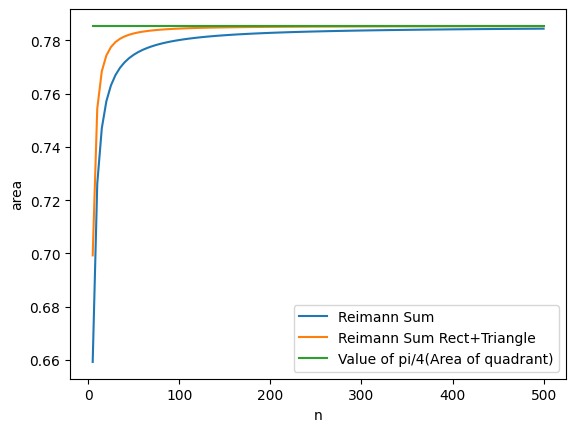

In [78]:
# Plot the Riemann sum approximations as a function of 'n'
plt.plot(x_vals, area_vals1)
plt.plot(x_vals, area_vals2)
plt.plot(x_vals, actual_area)
plt.legend(['Reimann Sum', 'Reimann Sum Rect+Triangle', 'Value of pi/4(Area of quadrant)'])
plt.xlabel('n')
plt.ylabel('area')
plt.show()

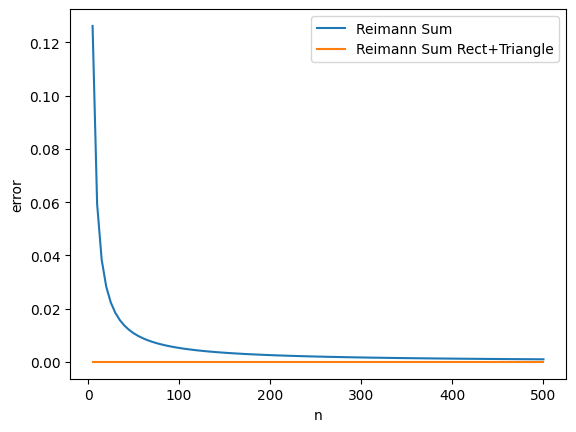

In [69]:
# Plot Error vs n
error_vals1 = [abs(area - area_of_quadrant) for area in area_vals1]
error_vals2 = [abs(area_rect_tri - area_of_quadrant) for area in area_vals2]
plt.plot(x_vals, error_vals1)
plt.plot(x_vals, error_vals2)
plt.legend(['Reimann Sum', 'Reimann Sum Rect+Triangle'])
plt.xlabel('n')
plt.ylabel('error')
plt.show()

## Integral calculus to calculate area

In [15]:
from scipy import integrate

In [16]:
# Defining y in terms of x as f(x)
def func(x): return (1 - x**2)**(1/2)

In [17]:
# Calculating the integration of f(x) with limits 0 and 1
result = integrate.fixed_quad(func, 0, 1, n=5)[0]

In [18]:
print(result)

0.7862954439173373


Integrating $\int_0^1 \sqrt{1 - x^2} dx$
1. **The Integral:**
   $
   I = \int_0^1 \sqrt{1 - x^2} \, dx
   $

2. **Substitute $ x = \sin \theta $:**

   We use the substitution $ x = \sin \theta $, hence $ dx = \cos \theta \, d\theta $. Also, when $ x = 0 $, $ \theta = 0 $, and when $ x = 1 $, $ \theta = \frac{\pi}{2} $.
   
   $$
   I = \int_0^{\frac{\pi}{2}} \sqrt{1 - \sin^2 \theta} \cdot \cos \theta \, d\theta
   $$

3. **Simplify Using the Identity $ \sqrt{1 - \sin^2 \theta} = \cos \theta $:**

   Using the Pythagorean identity $ \sqrt{1 - \sin^2 \theta} = \cos \theta $, the integral simplifies to:
   
   $$
   I = \int_0^{\frac{\pi}{2}} \cos^2 \theta \, d\theta
   $$

4. **Use the Double Angle Identity for $ \cos^2 \theta $:**

   Recall the identity $ \cos^2 \theta = \frac{1 + \cos 2\theta}{2} $. Thus, the integral becomes:
   
   $$
   I = \int_0^{\frac{\pi}{2}} \frac{1 + \cos 2\theta}{2} \, d\theta
   $$

5. **Split the Integral:**

   Now, split the integral into two parts:
   
   $$
   I = \frac{1}{2} \int_0^{\frac{\pi}{2}} 1 \, d\theta + \frac{1}{2} \int_0^{\frac{\pi}{2}} \cos 2\theta \, d\theta
   $$

6. **Evaluate the First Integral:**

   The first integral is straightforward:
   
   $$
   \frac{1}{2} \int_0^{\frac{\pi}{2}} 1 \, d\theta = \frac{1}{2} \cdot \frac{\pi}{2} = \frac{\pi}{4}
   $$

7. **Evaluate the Second Integral:**

   The second integral can be evaluated as follows:
   
   $$
   \frac{1}{2} \int_0^{\frac{\pi}{2}} \cos 2\theta \, d\theta = \frac{1}{2} \cdot \left[ \frac{\sin 2\theta}{2} \right]_0^{\frac{\pi}{2}} = \frac{1}{2} \cdot 0 = 0
   $$

8. **Final Answer:**

   Combining both results, the value of the integral is:
   
   $$
   I = \frac{\pi}{4}
   $$

Thus, the integral $ \int_0^1 \sqrt{1 - x^2} \, dx = \frac{\pi}{4} $.

In [19]:
import numpy as np

In [20]:
np.pi/4

0.7853981633974483

## Geometry to calculate area

In [21]:
radius = 1
area_of_circle = np.pi * radius**2
area_of_quadrant = area_of_circle / 4
print(area_of_quadrant)

0.7853981633974483


## Summary

In [23]:
import pandas as pd

In [82]:
summary = pd.DataFrame({'Method': ['Reimann Sum', 'Reimann Sum Rect+Triangle', 'Integral Calculus', 'Geometry'],
                        'Area': [area, area_rect_tri, result, area_of_quadrant],
                        'Error': [abs(area - area_of_quadrant), abs(area_rect_tri - area_of_quadrant), abs(area - area_of_quadrant), 0]})
summary.set_index('Method', inplace=True)

In [83]:
summary.T

Method,Reimann Sum,Reimann Sum Rect+Triangle,Integral Calculus,Geometry
Area,0.780104257944762,0.784398921145778,0.786295,0.785398
Error,0.00529390545268660,0.000999242251670140,0.00529390545268660,0
